In [4]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
import statistics
import matplotlib
from scipy import stats
%matplotlib inline

A.

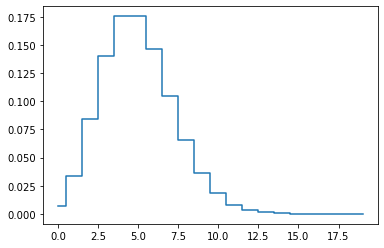

In [58]:
#Day 1 data
fig,ax, = plt.subplots(1,1)
cosmic = 5
distribution = poisson(cosmic)
x = np.arange(0,20)
day1 = distribution.pmf(x)
plt.step(x,day1,where = 'mid')

This shows the distribution for background data of day 1 measurements. Now I will show the background data several days after from convolution:

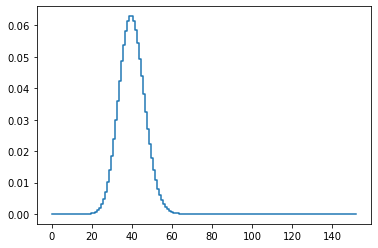

In [3]:
fig,ax, = plt.subplots(1,1)
day2 = np.convolve(day1,day1)
day3 = np.convolve(day1,day2)
day4 = np.convolve(day1,day3)
day5 = np.convolve(day1,day4)
day6 = np.convolve(day1,day5)
day7 = np.convolve(day1,day6)
day8 = np.convolve(day1,day7)
x = np.arange(0,153)
plt.step(x,day8, where = 'mid')

B.

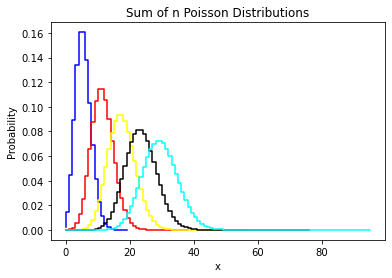

In [5]:
mu = 6
distribution = poisson(mu)
fig, ax = plt.subplots(1,1)
plt.title('Sum of n Poisson Distributions')
plt.ylabel('Probability')
plt.xlabel('x')
#one day
x = np.arange(0, 20)
day1 = distribution.pmf(x)
day1Plot = plt.step(x,day1,color='blue')

day2 = np.convolve(day1,day1)
x = np.arange(0,39)
day2Plot = plt.step(x,day2,color='red')

day3 = np.convolve(day1,day2)
x = np.arange(0,58)
day3Plot = plt.step(x,day3,color='yellow')

day4 = np.convolve(day1,day3)
x = np.arange(0,77)
day4Plot = plt.step(x,day4,color='black')

day5 = np.convolve(day1,day4)
x = np.arange(0,96)
day5Plot = plt.step(x,day5,color='cyan')

We can see that as we add more and more of the distributions (each representing the day), the overall distribution in cyan (shown above) appraoches a gaussian because it is more centered. However, this is still considered a poisson distribution because each individual distribution is still discrete, i.e. the measurements we are making with the gamma rays are discrete so the summed distribution will still be discrete.

C.

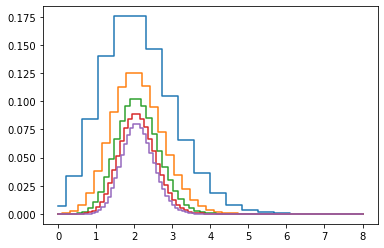

In [59]:
points = day1.size
def plt_avg(rng):
    fig,ax = plt.subplots(1,1)
    avg = day1
    for i in range(rng):
        x = np.linspace(0,8,avg.size)
        ax.step(x,avg,where = 'mid')
        avg = np.convolve(avg,day1)
plt_avg(5)   

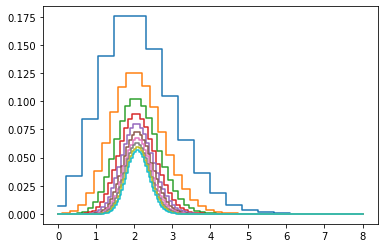

In [60]:
plt_avg(10)

This is a different result than problem b. We can see that averaging the distriution merely reduces the size of the peak, but it also makes the distribution more symmetric. Unlike in problem b, the distribution does not shift at all. This makes complete sense because the central limit theorm says that as we average the distribution more and more, it approaches the gaussian shape which is exactly what we see here. The top plot shows 5 distributions being averaged while the second plot shows 10 distributions averaged. We can see that the more distributions we average, the closer the shape approaches that familiar bell curve shape.

D.

In [16]:
N = 5
gamma = 7
gammaRays = N * gamma

x = np.linspace(0,50,51)
background = poisson.pmf(x,cosmic)
avg = background
for i in range(N):
    avg = np.convolve(avg,background)

prob = sum(avg[0:gammaRays])
norm.ppf(prob)
    

0.832045346715195

Problem 2

A.

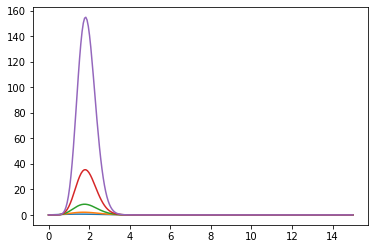

In [20]:
def plt_skew(high):
    fig,ax=plt.subplots(1,1)
    x = np.linspace(0,10)
    distribution = rayleigh.pdf(x)
    avg = distribution
    for i in range(high):
        x1 = np.linspace(0,15,avg.size)
        ax.plot(x1,avg)
        avg = np.convolve(avg,distribution)
plt_skew(5)

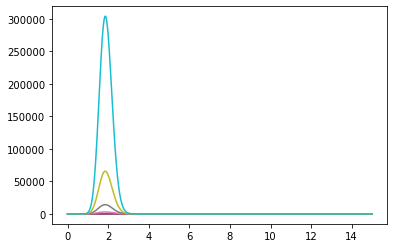

In [21]:
plt_skew(10)

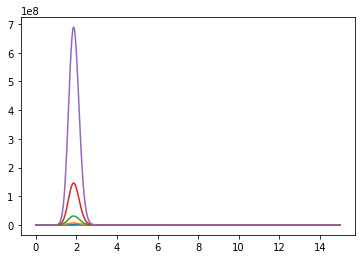

In [22]:
plt_skew(15)

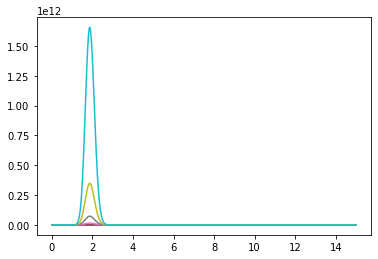

In [23]:
plt_skew(20)

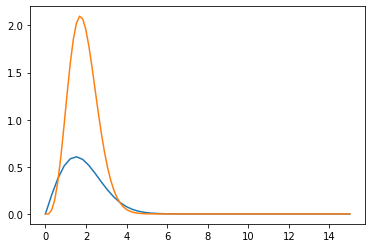

In [24]:
plt_skew(2)

In [ ]:
B.

We can see that as we average over more observing intervals (first 4 plots), the distribution approaches a symmetric bell curve shape. The last plot shows a familiar rayleigh shape (in blue) which has a long sweeping tail on the right and a short tail on the left side. However, even after one interval (orange above), the curve is very close to a gaussian shape. It seems that at around 10 observable intervals, the skew in the rayleigh distribution is almost completely gone. After this, adding more intervals looks like it increases the peak of the distribution 

Problem 3

Version 1:

The background distribution is a gaussian. To find the probability that the background produced this signal, we want to use cdf() function. This will integrate from positive infinity to that point. But it would make more sense to integrate from the point to infinity so a solution to this is to simply subtract the probability from 1.

In [42]:
X = 4 #width
Y = 4.8  #strength (float)
#significant discovery is 5 sigma or more
f = norm.cdf(X)
probability = 1-f
probability

3.167124183311998e-05

This is the probability that a certain measurement is greater than 4.8. Next we will use this probability to find the sigma value using the normal distributio:

In [28]:
abs(norm.ppf(probability))

4.0

This value is less than the 5σ threshold, so this is not a discovery.

Version 2:

B.

We know that the background is a zero mean gaussian with constant width and the sky data consists of 10k pixels. We need to find a signal in 10k pixels, so we can consider the 10k pixels as the background distribution. Therefore we can ask the statistical question:what is the probability distribution of 10k pixels? We can 

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

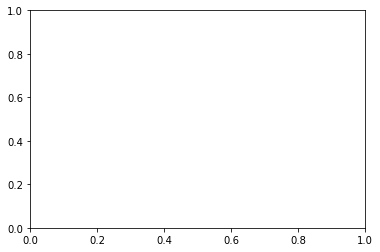

In [43]:
fig,ax = plt.subplots(1,1)
X = 4 #width
Y = 4.8  #strength (float)
f = norm.cdf(X)
probability = 1-f
pixels = 10000
prob10 = pixels * probability #probability of 10k pixels

x = np.linspace(-10,10,100)
distribution = norm.pdf(x,scale = X)
ax.plot(x,prob10)
#not sure what is going on here. 
#Trying to make backgroun distribution


In [44]:
sigma = norm.ppf(prob10)
print(sigma)

-0.47691192965346846


0.5σ is less than the 5σ threshold so this is not considered a discovery 

Problem 4

A.

In [53]:
prob5_1 = norm.cdf(5) #probability for 5sigma in version1
signal1 = norm.ppf(prob5_1,scale=X)
print(signal1)

19.999999999880703


B.

In [52]:
#for version 2, we need to divide by 10000 to get signal from one pixel
prob5_2 = norm.cdf(5)/10000
signal2 = norm.ppf(prob5_2,scale=X)
print(signal2)


-14.87606623148101


C.

In [56]:
ratio = signal2/signal1
abs(ratio)

0.7438033115784871

The signal strength of 10k is 74% the strength of 1 pixel. This means that the signal strength needs to be increased by 26% to be the same as 1 pixel.

D. If we use a trials factor of 10000000

In [57]:
prob = norm.cdf(5)/10000000
signal3 = norm.ppf(prob,scale=X)
print(signal3)

-20.797350541913666
